In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from f1_simulation.dataprocessing import F1Dataset
sns.set_palette("inferno", 2)

In [161]:
data = F1Dataset('data')

In [162]:
results = pd.read_csv('results.csv')
results.head()
results['lap_no'] += 1

In [163]:
df = results.join(data.lap_times.set_index(['raceId', 'driverId', 'lap']), on=['race_id', 'driver', 'lap_no'])

In [164]:
df

,race_id,driver,constructor,course,current_time,year,laps_since_pit_stop,lap_no,overtaking_mode,pit_stopping,pit_stop_duration,sampled_lap_time,position,time,milliseconds
0,841,814,10,1,91.176583,2011,1,1,success,False,None,70.176583,10.0,1:47.562,107562.0
1,841,808,4,1,92.843781,2011,1,1,success,False,None,73.843781,4.0,1:42.835,102835.0
2,841,1,1,1,95.723534,2011,1,1,None,False,None,95.723534,2.0,1:40.573,100573.0
3,841,3,131,1,101.936061,2011,1,1,success,False,None,99.936061,7.0,1:45.340,105340.0
4,841,20,9,1,111.751197,2011,1,1,success,False,None,100.751197,1.0,1:38.109,98109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252172,1073,854,210,24,5670.103442,2021,17,58,None,False,None,92.146872,NaN,NaN,NaN
252173,1073,841,51,24,5731.181780,2021,1,58,None,False,None,113.686734,NaN,NaN,NaN
252174,1073,8,51,24,5805.771525,2021,3,58,None,False,None,101.653914,NaN,NaN,NaN
252175,1073,839,214,24,6823.846768,2021,0,58,None,True,17.19424203929867,78.701288,9.0,1:28.249,88249.0


In [165]:

df['simulated_lap_time_total'] = df.groupby(['race_id', 'driver'])['current_time'].diff()

/home/sam/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


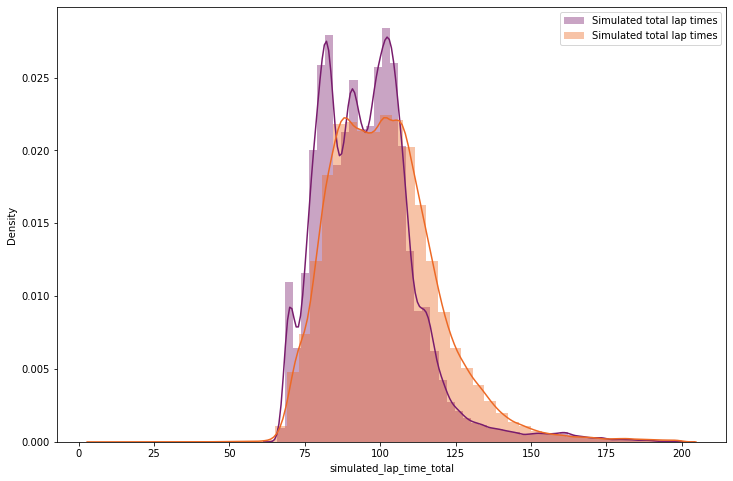

In [175]:

plt.figure(figsize=(12, 8))
sane_df = df.loc[df['simulated_lap_time_total'].between(0, 200)]
sane_df = sane_df.loc[sane_df['milliseconds'].between(0, 200000)]
sns.distplot(sane_df['milliseconds'] / 1000, label='Simulated total lap times')
sns.distplot(sane_df['simulated_lap_time_total'], label='Simulated total lap times')
plt.legend()

/home/sam/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

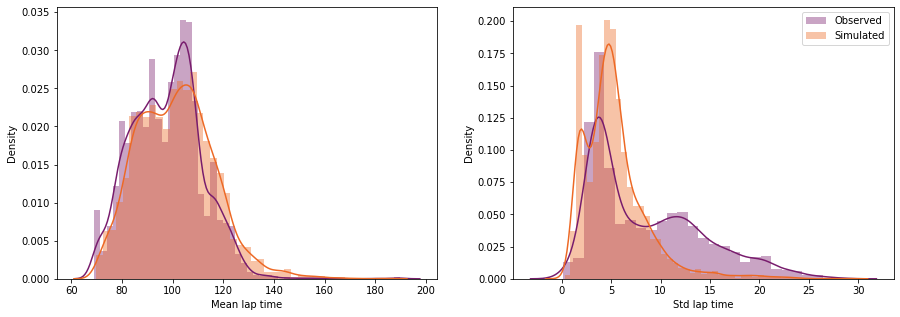

In [176]:
sane_df['lap_time_real'] = sane_df['milliseconds'] / 1000
sane_df['lap_time_sim'] = sane_df['sampled_lap_time']
lap_time_means_real = sane_df.groupby(['race_id', 'driver'])['lap_time_real'].mean()
lap_time_means_sim = sane_df.groupby(['race_id', 'driver'])['lap_time_sim'].mean()
lap_time_stds_real = sane_df.groupby(['race_id', 'driver'])['lap_time_real'].std()
lap_time_stds_sim = sane_df.groupby(['race_id', 'driver'])['lap_time_sim'].std()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(lap_time_means_real, label='Observed', ax=ax[0])
sns.distplot(lap_time_means_sim, label='Simulated', ax=ax[0])
sns.distplot(lap_time_stds_real[lap_time_stds_real < 30], label='Observed', ax=ax[1])
sns.distplot(lap_time_stds_sim[lap_time_stds_sim < 30], label='Simulated', ax=ax[1])
plt.legend()
ax[0].set_xlabel('Mean lap time')
ax[1].set_xlabel('Std lap time')

fig.savefig('lap_times.png')

In [168]:
df['sim_position'] = df.groupby(['race_id', 'lap_no'])['current_time'].rank()
df['sim_position_change'] = df.groupby(['race_id', 'driver'])['sim_position'].diff()
df['position_change'] = df.groupby(['race_id', 'driver'])['position'].diff()
df


,race_id,driver,constructor,course,current_time,year,laps_since_pit_stop,lap_no,overtaking_mode,pit_stopping,pit_stop_duration,sampled_lap_time,position,time,milliseconds,simulated_lap_time_total,sim_position,sim_position_change,position_change
0,841,814,10,1,91.176583,2011,1,1,success,False,None,70.176583,10.0,1:47.562,107562.0,NaN,1.0,NaN,NaN
1,841,808,4,1,92.843781,2011,1,1,success,False,None,73.843781,4.0,1:42.835,102835.0,NaN,2.0,NaN,NaN
2,841,1,1,1,95.723534,2011,1,1,None,False,None,95.723534,2.0,1:40.573,100573.0,NaN,3.0,NaN,NaN
3,841,3,131,1,101.936061,2011,1,1,success,False,None,99.936061,7.0,1:45.340,105340.0,NaN,4.0,NaN,NaN
4,841,20,9,1,111.751197,2011,1,1,success,False,None,100.751197,1.0,1:38.109,98109.0,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252172,1073,854,210,24,5670.103442,2021,17,58,None,False,None,92.146872,NaN,NaN,NaN,92.146872,15.0,0.0,NaN
252173,1073,841,51,24,5731.181780,2021,1,58,None,False,None,113.686734,NaN,NaN,NaN,113.686734,16.0,0.0,NaN
252174,1073,8,51,24,5805.771525,2021,3,58,None,False,None,101.653914,NaN,NaN,NaN,101.653914,17.0,0.0,NaN
252175,1073,839,214,24,6823.846768,2021,0,58,None,True,17.19424203929867,78.701288,9.0,1:28.249,88249.0,95.895288,18.0,0.0,0.0


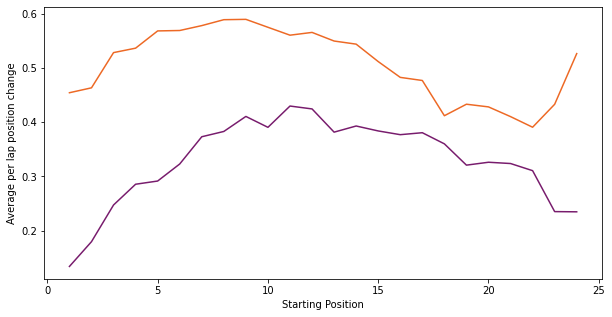

In [177]:
import numpy as np
# Average abs per lap position change vs starting position
starting_positions = df.groupby(['race_id', 'driver'])['position'].first()
real_pos_change = df.groupby(['race_id', 'driver'])['position_change'].apply(lambda x: np.mean(np.abs(x)))
sim_pos_change = df.groupby(['race_id', 'driver'])['sim_position_change'].apply(lambda x: np.mean(np.abs(x)))
starting_positions

positions_df = pd.DataFrame({'Starting Position': starting_positions, 'Average per lap position change': real_pos_change, 'sim_pos_change': sim_pos_change})
# positions_df = positions_df.join(sim_pos_change)
positions_df
# positions_df
plt.figure(figsize=(10, 5))
positions_df.groupby(['Starting Position'])['Average per lap position change'].mean().plot()
positions_df.groupby(['Starting Position'])['sim_pos_change'].mean().plot()
plt.ylabel('Average per lap position change')
plt.savefig('per_lap_pos_change.png')